Este colab fue desarrollado por Arnold Charry Armero

# Ghandi Clothing Fixed-Cost

Gandhi Cloth Company es capaz de fabricar tres tipos de ropa: camisas, pantalones cortos,
y pantalones. La fabricación de cada tipo de ropa requiere que Gandhi tenga disponible el tipo de maquinaria adecuado. La maquinaria necesaria para fabricar cada tipo.
de ropa debe alquilarse a las siguientes tarifas: maquinaria para camisas, 200 dólares por semana; bermudas
maquinaria, 150 dólares por semana; Maquinaria para pantalones, $100 por semana. La fabricación de cada
tipo de ropa también requiere las cantidades de tela y mano de obra que se muestran en la Tabla 2. Cada semana,
Se encuentran disponibles 150 horas de mano de obra y 160 yardas cuadradas de tela. El costo unitario variable y el precio de venta para cada tipo de ropa se muestran en la Tabla 3. Formule un IP cuya solución
maximizará las ganancias semanales de Gandhi

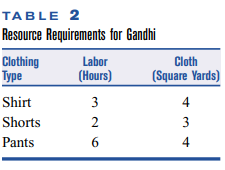

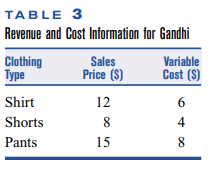

# Conjuntos

$ i = \text{Prenda indexada por } i$

## Parámetros

$ H_{i} = \textrm{Horas que se necesitan por prenda } i$

$ MH = \textrm{Máximo número de horas permitido } $

$ MP_{i} = \textrm{Materia prima necesitada por prenda }i$

$ MM = \textrm{Máximo número de materia prima permitida } $

$ M = \textrm{Número muy grande para conectar variables } $

$ CV_{i} = \textrm{Costo variable de la prenda } i$

$ CF_{i} = \textrm{Costo fijo de la prenda } i$

$ I_{i} = \textrm{Ingresos de la prenda } i $


## Variables de decisión

$ x_{i} = \textrm{Número de prendas } i \textrm{ producidas} $

$ y_{i} = \textrm{1 se utiliza la máquina para la prenda } i \textrm{, 0 lo contrario} $


## Función Objetivo

$$ \textrm{Max } z = \sum_{i = 1}^{n} I_{i}\: x_{i} - \sum_{i = 1}^{n} CV_{i}\: x_{i} - \sum_{i = 1}^{n} CF_{i}\: y_{i}$$

## Restricciones

No se puede sobrepasar el número de horas disponible,

$$ \sum_{i = 1}^{n} H_{i}\: x_{i} \leq MH$$

No se puede rebasar la materia prima que se tiene disponible,

$$ \sum_{i = 1}^{n} MP_{i}\: x_{i} \leq MM $$

Restricción de flujo que indica que si no hay máquina, no hay producción.

$$ x_{i} \leq M y_{i} $$

In [1]:
#Se instala la libreria
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 26.2 MB/s eta 0:00:00


In [2]:
#Se importa la libreria
from pulp import *

In [3]:
#Conjuntos
prendas = range(3)

In [5]:
#Parámetros

H = [3, 2, 6]

HM = 150

MP = [4, 3, 4]

MM = 160

I = [12, 8, 15]

CV = [6, 4, 8]

CF = [200, 150, 100]

M = 10000

In [6]:
# Crear la instancia del modelo
model = LpProblem(name="Ghandi_Clothing_Fixed_Cost", sense=LpMaximize)

# Inicialización de las variables de decisión
X = LpVariable.dicts("X", (prendas), 0, None, LpInteger)
Y = LpVariable.dicts("Y", (prendas), 0, 1, LpInteger)

# Función objetivo
model += lpSum([I[i] * X[i] for i in prendas]) - lpSum([CV[i] * X[i] for i in prendas]) - lpSum([CF[i] * Y[i] for i in prendas])


# Agregar las restricciones

model += lpSum([H[i] * X[i] for i in prendas]) <= HM

model += lpSum([MP[i] * X[i] for i in prendas]) <= MM

for i in prendas:
    model += X[i] <= M * Y[i]

# Resolver el problema
model.solve()

# Imprimir el estado del problema
print("Status:", LpStatus[model.status])

# Imprimir las variables
for v in model.variables():
    print(v.name, "=", v.varValue)

# Imprimir la función objetivo
print("Utilidades totales = $", value(model.objective))

Status: Optimal
X_0 = 0.0
X_1 = 0.0
X_2 = 25.0
Y_0 = 0.0
Y_1 = 0.0
Y_2 = 1.0
Utilidades totales = $ 75.0
